### 画素ごとの濃淡変換  
入力画像を処理した結果再び出力する物の中で、特にそれぞれの画素に処理が行われるものについて扱う。

#### 明るさ・コントラストの変換
画像の見え方の変化として、最も一般的かつ有用なものは、画像の明るさやコントラストの変化である。
##### トーンカーブ
デジタル画像の各画素は濃淡を表す画素地(0~255)を持っている。
画像の濃淡を変化させるには、入力画像のそれぞれの画素地に対して、出力画像の画素地をどのように対応づけるかを指定すればよい。
そのような対応関係を与える関数を階調変換関数(gray-level transformation function)と言い、  
またそれをグラフで表したものをトーンカーブ(tone curve)という。  
* 折れ線型トーンカーブ
* 累計型トーンカーブ(ガンマ補正)
* S字トーンカーブ  
※http://optie.hatenablog.com/entry/2018/03/03/141427

##### ヒストグラム平坦化


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gray_histogram(imgpath):
    # 入力画像を読み込み
    img = cv2.imread(imgpath)    
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    return hist

def show_hist(hist):
    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()

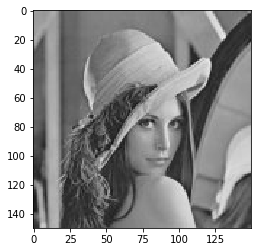

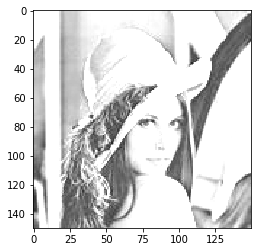

In [15]:
#折れ線型トーンカーブ(1)
img = cv2.imread('./images/gray_Lenna.jpg')
plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

lookUpTable = np.zeros((256, 1), dtype = 'uint8')
for i in range(256):
    lookUpTable[i][0] = min(2*i,255)

y = cv2.LUT(img, lookUpTable)


plt.imshow(y, cmap='gray',vmin = 0, vmax = 255)
plt.show()

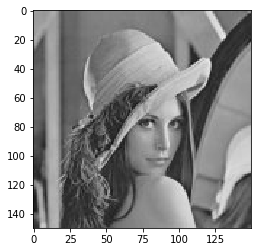

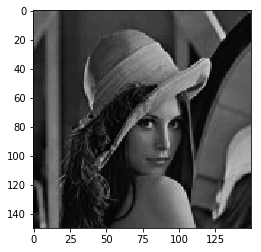

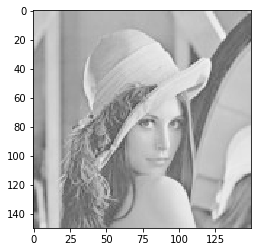

In [23]:
#ガンマ補正(木村さんのコードより)
def gamma_conversion(src, gamma=0.75):
    lut_g = np.arange(256, dtype='uint8')
    for i in range(256):
        lut_g[i] = 255*pow(float(i)/255, 1.0/gamma)
    return cv2.LUT(src, lut_g)

img = cv2.imread('./images/gray_Lenna.jpg')
plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

gamma = gamma_conversion(img, gamma=0.5)
plt.imshow(gamma, cmap='gray',vmin = 0, vmax = 255)
plt.show()

gamma = gamma_conversion(img, gamma=2)
plt.imshow(gamma, cmap='gray',vmin = 0, vmax = 255)
plt.show()




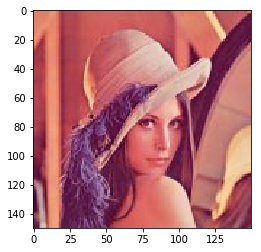

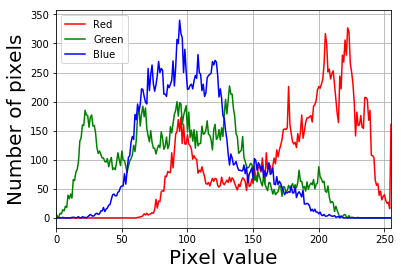

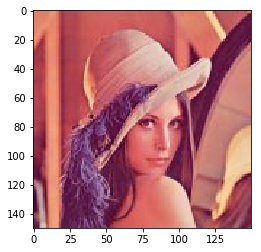

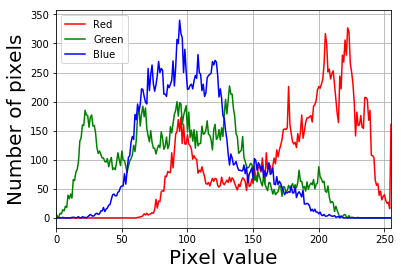

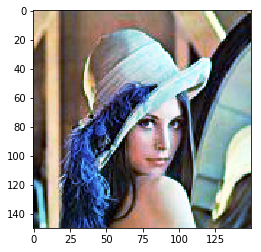

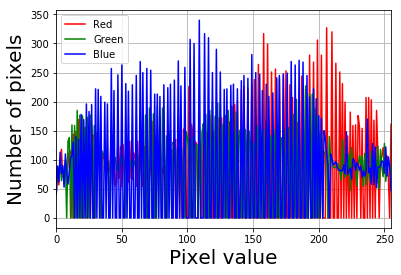

In [33]:
#ヒストグラム平坦化

def equalize_hist_rgb(src):
    rgb=cv2.split(src)
    for i in range(3):
        cv2.equalizeHist(rgb[i])
    out = cv2.merge([rgb[0], rgb[1], rgb[2]])
    return out

def equalize_hist_rgb_ichiki(src):
    rgb=cv2.split(src)
    b=cv2.equalizeHist(rgb[0])
    g=cv2.equalizeHist(rgb[1])
    r=cv2.equalizeHist(rgb[2])
    out = cv2.merge([b, g, r])
    return out



def rgb_histogram(img):
    # 入力画像を読み込み
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    # 方法2(OpenCVでヒストグラムの算出)
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    
    return hist_r, hist_g, hist_b

def rgbhist_show(hist_r, hist_g, hist_b):
    # グラフの作成
    plt.xlim(0, 255)
    plt.plot(hist_r, "-r", label="Red")
    plt.plot(hist_g, "-g", label="Green")
    plt.plot(hist_b, "-b", label="Blue")
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()


img = cv2.imread('./images/lenna.jpg')
hist_r, hist_g, hist_b = rgb_histogram(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
rgbhist_show(hist_r, hist_g, hist_b)

img = cv2.imread('./images/lenna.jpg')
hist = equalize_hist_rgb(img)
hist_r, hist_g, hist_b = rgb_histogram(hist)
hist = cv2.cvtColor(hist, cv2.COLOR_BGR2RGB)
plt.imshow(hist)
plt.show()
rgbhist_show(hist_r, hist_g, hist_b)

img = cv2.imread('./images/lenna.jpg')
hist = equalize_hist_rgb_ichiki(img)
hist_r, hist_g, hist_b = rgb_histogram(hist)
hist = cv2.cvtColor(hist, cv2.COLOR_BGR2RGB)
plt.imshow(hist)
plt.show()
rgbhist_show(hist_r, hist_g, hist_b)

